We need the following TIC_CTL6.2 from here: https://psu.box.com/s/omqctjra8q8dthb7v11b6h37loubmt27
Optionally, assumes you have R and the SPADAR package installed.

In [1]:
#Import everything we need
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 300
rcParams["figure.dpi"] = 300

import glob
import matplotlib.pyplot as pl
import pandas as pd
np = pd.np

In [2]:
#Set constraints
cutoff = 1e1           #In Degrees, distance from ecliptic poles
decrang = [-8e0,7e1]   #Declination cut off of HET 
specflag='cooldwarf'   #The spectral flag we want to sort by
maxtemp=3.5e3          #The maximum temperature to consider
maxj=10.0              #The maximum 2MASS J magnitude

In [3]:
#Read the TIC Catalogue
star = pd.read_csv(glob.glob('tic*').pop(0))
df = star[star.SPEC_LIST == specflag]

/mnt/c/Users/cuc305_admin/Documents/pythonvirt/py27/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#List all columns available
df.columns

Index([u'RA', u'DEC', u'TESSMAG', u'TEFF', u'PRIORITY', u'RADIUS', u'MASS',
       u'CONTRATIO', u'ECLONG', u'ECLAT', u'GLONG', u'GLAT', u'LUM_CLASS',
       u'PLX', u'DIST', u'TOT_PM', u'V', u'J', u'H', u'Ks', u'G', u'u', u'g',
       u'r', u'i', u'z', u'W1', u'W2', u'W3', u'W4', u'HIP', u'TYCHO2',
       u'2MASS', u'TICID', u'SPEC_LIST', u'PRIO_TIC4', u'PRIO_TIC5',
       u'PRIO_TIC61', u'PRIO_NO_CONTAM', u'PRIO_NO_BOOST', u'TEFF_SRC_FLAG',
       u'STARCHAR_FLAG', u'RADIUS_ERR', u'MASS_ERR', u'LOGG', u'LOGG_ERR',
       u'RHO', u'RHO_ERR', u'LUM', u'LUM_ERR', u'N_STAR', u'N_CONT', u'N_SKY',
       u'N_READ', u'N_SYS'],
      dtype='object')

In [5]:
#Cull by telescope range, temperature, magnitude, etc.
cull = (df.DEC <= np.max(decrang)) & (df.DEC >= np.min(decrang)) & \
       (df.TEFF <= maxtemp) & (df.J <= maxj)
cvz = df.ECLAT >= (9e1-cutoff)
targets = df[cull & cvz].sort_values('TEFF')

Optional R plotting with equatorial and ecliptic grids below:

In [6]:
%load_ext rpy2.ipython
%R require(SPADAR)

/mnt/c/Users/cuc305_admin/Documents/pythonvirt/py27/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: SPADAR

  warnings.warn(x, RRuntimeWarning)
/mnt/c/Users/cuc305_admin/Documents/pythonvirt/py27/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: mapproj

  warnings.warn(x, RRuntimeWarning)
/mnt/c/Users/cuc305_admin/Documents/pythonvirt/py27/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: maps

  warnings.warn(x, RRuntimeWarning)
/mnt/c/Users/cuc305_admin/Documents/pythonvirt/py27/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: RCEIM

  warnings.warn(x, RRuntimeWarning)


array([1], dtype=int32)

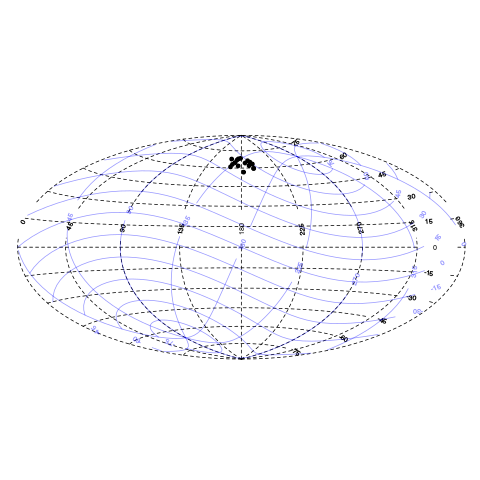

In [7]:
%%R -i targets
createAllSkyGridChart(mainGrid="equatorial", eqDraw=T, eclDraw=T, galDraq=F,addLab=T,
                      eqCol="black", eclCol=rgb(0,0,1,0.4), eclLty=1, eqLty=2, main = "")
overplotScatterPlotInAllSkyGridChart(targets$RA,targets$DEC,mainGrid="equatorial", dataCoordSys="equatorial",
                                     pointcol="black", pch=19,pointsize=0.75)

Plotting with Python and exporting things!s

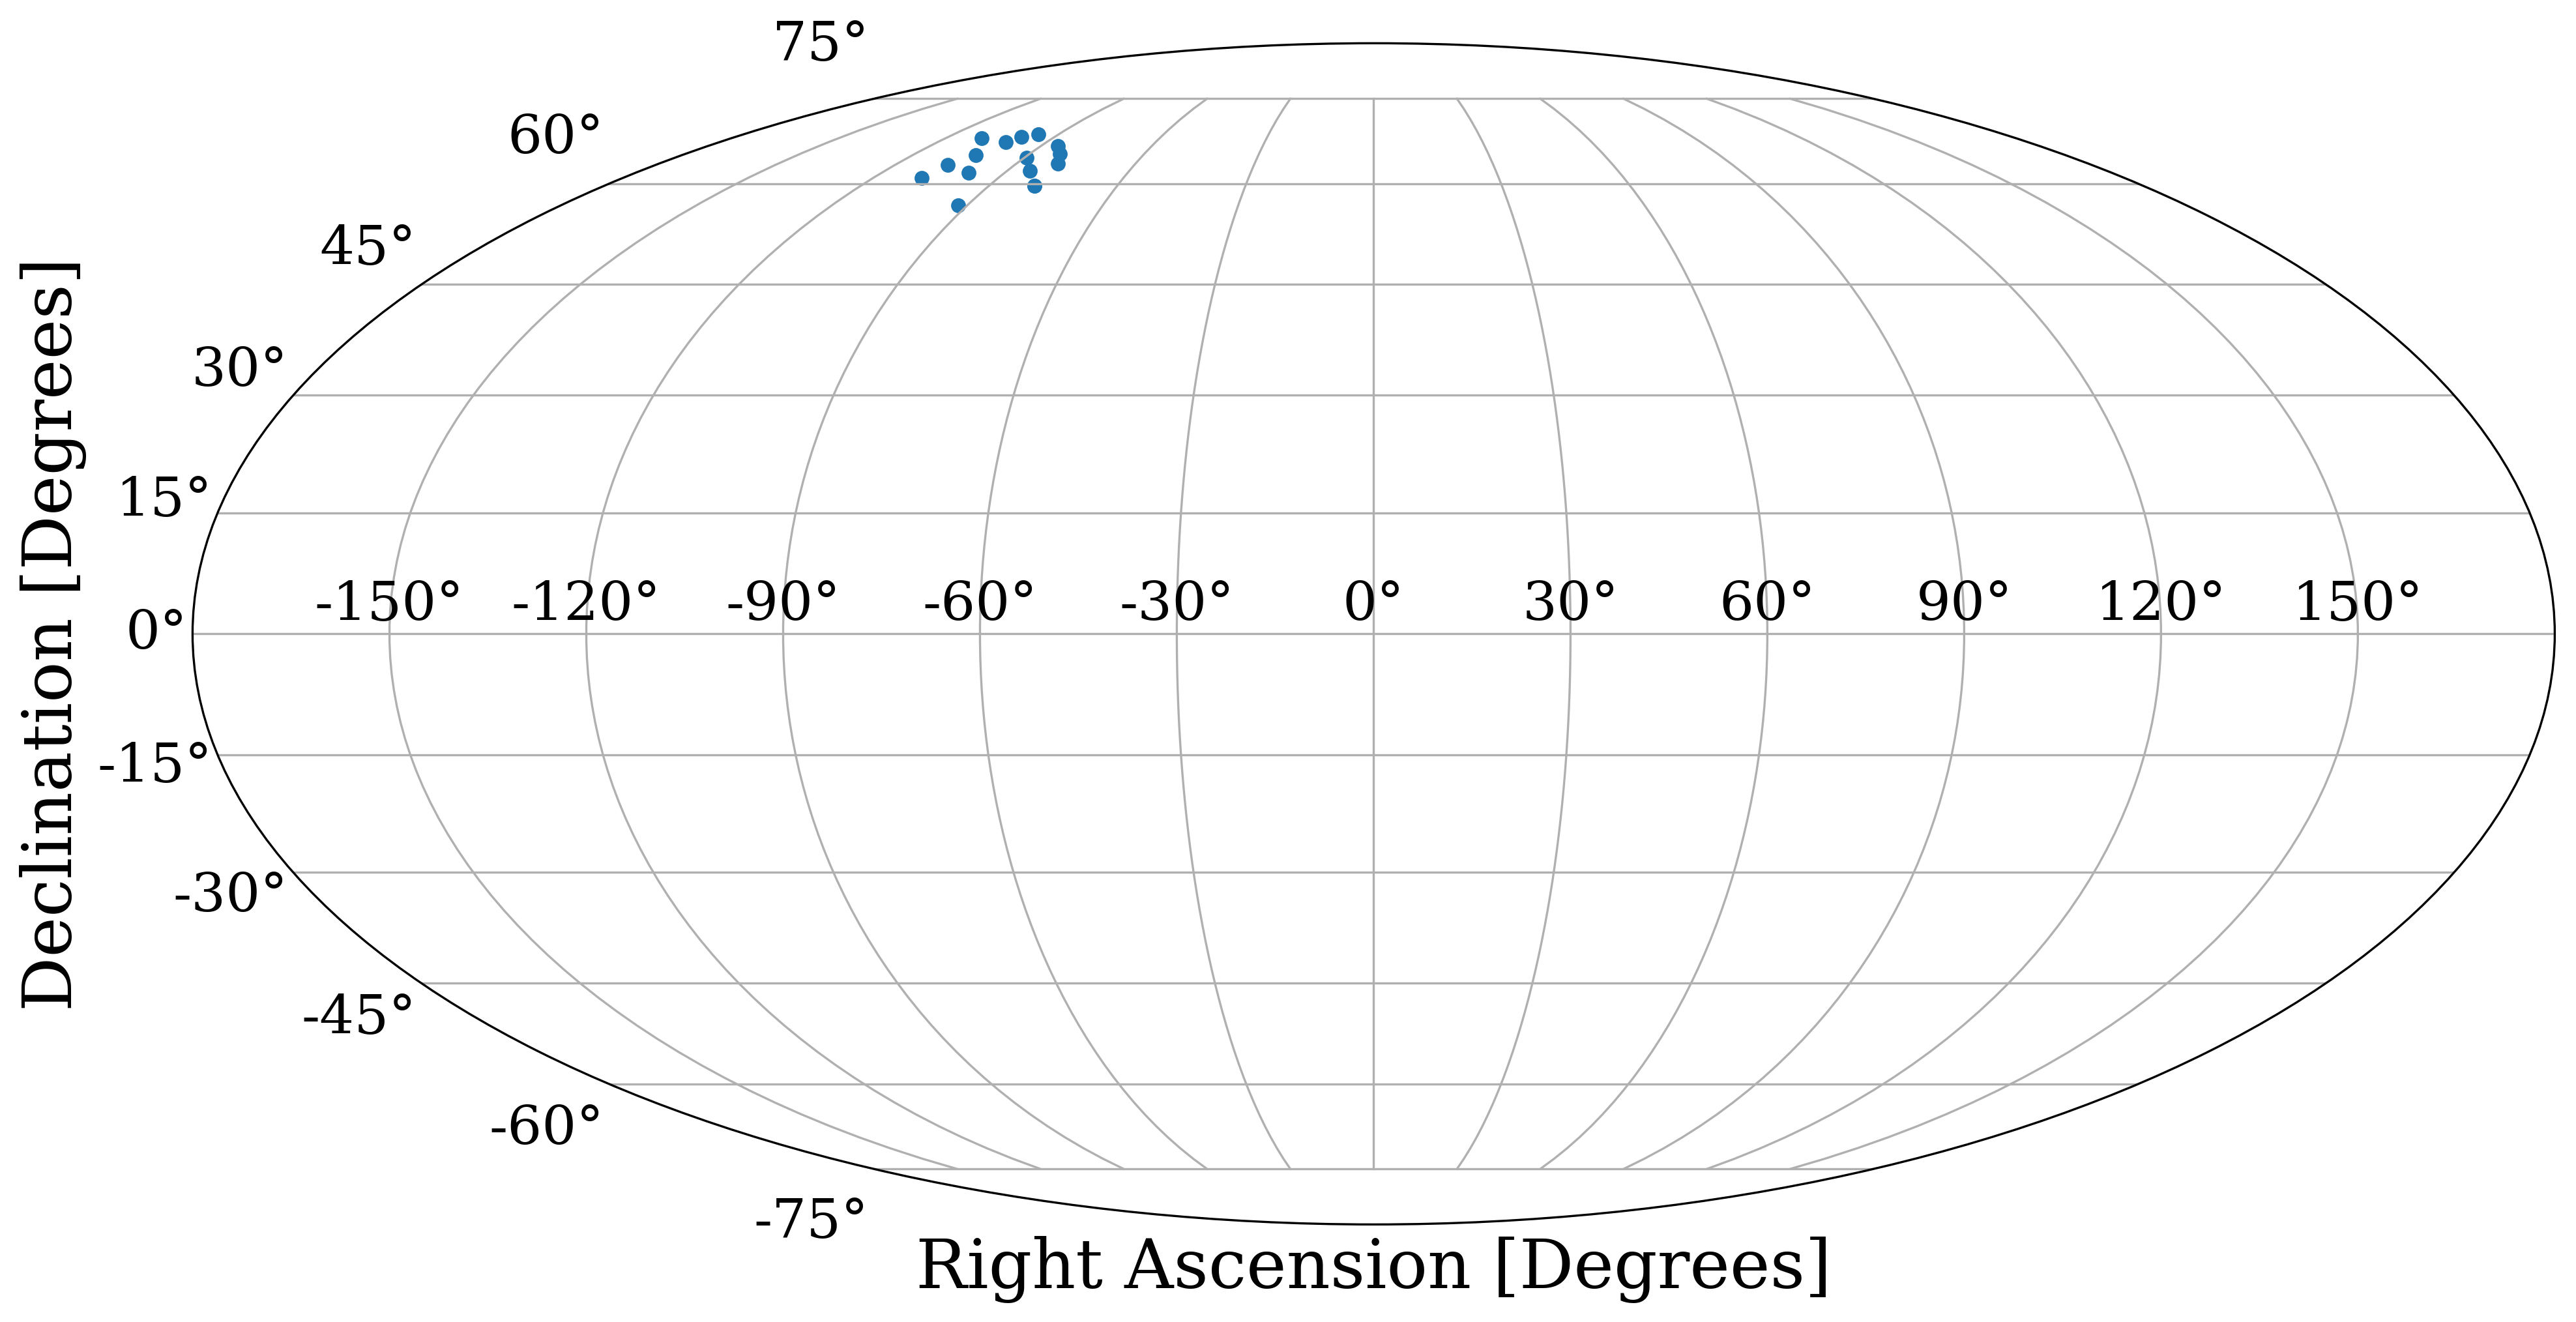

In [8]:
#Show with Python
ra = np.deg2rad(( targets.RA + 1.8e2) % ( 3.6e2 ) - 1.8e2)
dec = np.deg2rad(targets.DEC)
fig = pl.figure(figsize=(16,8)); pl.rc('xtick',labelsize=20); pl.rc('ytick',labelsize=20)
pl.rc('font', family='serif',weight='normal')
pl.rcParams['mathtext.fontset'] = 'dejavuserif'
ax = fig.add_subplot(111, projection = 'mollweide')
ax.grid(True)
ax.set_xlabel('Right Ascension [Degrees]',fontdict={'size':25})
ax.set_ylabel('Declination [Degrees]',fontdict={'size':25})
ax.scatter(ra,dec,marker='o',s=20)

In [ ]:
#Export the targets into a CSV
targets[['RA','DEC','TEFF','J','V',
         'MASS','RADIUS','RADIUS_ERR','MASS_ERR',
         'ECLONG','ECLAT','GLONG','GLAT',
         'HIP','TYCHO2','2MASS','TICID']].to_csv('targetlist.csv',index=False)